# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- When Will Bitcoin hit the Much-Anticipated Milestone of $50K ?.  The post When Will Bitcoin hit the Much-Anticipated Milestone of $50K ? appeared first on Coinpedia - Fintech &amp; Cryptocurreny News Media| Crypto GuideThe market is finally reflecting broad optimism, with Bitcoin finally breaking above the $45,000 resistance level that had held it back for months. Over the last 24 hours, the market has continued to rise, while Bitcoin and Ethereum, the market leaders, rose more than 6% in the last 24 hours, with sharp jumps higher.&#160; After &#8230; ... [| Skaityti daugiau](https://coinpedia.org/bitcoin/when-will-bitcoin-hit-the-much-anticipated-milestone-of-50k/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Shanghai Covid: Oil prices fall after city starts lockdown.  The nine-day lockdown of Shanghai is China's largest since the coronavirus outbreak began. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/business-60896794) 

### Kainų kaita pandemijos metu

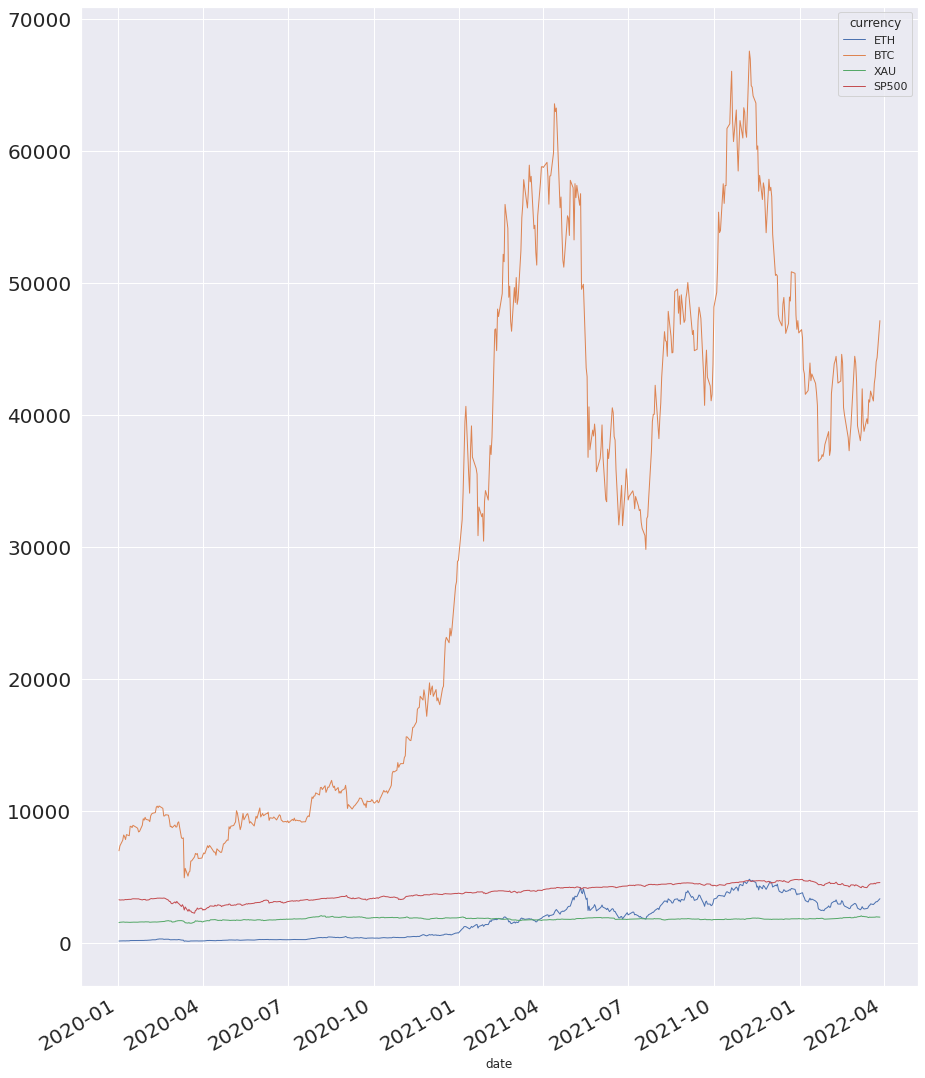

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904368,0.206024,0.921533
BTC,0.904368,1.000000,0.172894,0.872507
XAU,0.206024,0.172894,1.000000,0.344443
SP500,0.921533,0.872507,0.344443,1.000000


In [8]:
#hide ### Koreliacijos matrica.

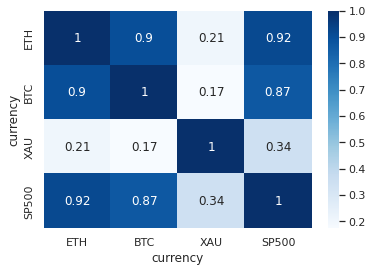

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')